In [1]:
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg
import scipy.signal as ss
from neurokit2 import ecg_delineate
from tqdm import tqdm
import pandas as pd

In [2]:
# Load data
def load_data(train_path, test_path):
    train = pd.read_csv(train_path, index_col="id")
    test = pd.read_csv(test_path, index_col="id")
    return train, test

# Handle NaNs and normalize
def preprocess_signals(data):
    # Fill NaNs with 0
    data = data.fillna(0)
    # Normalize each signal
    signal_cols = [col for col in data.columns if col.startswith('x')]
    data[signal_cols] = data[signal_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=1)
    return data

# Load train and test data
train_path = "data/train.csv"
test_path = "data/test.csv"
train, test = load_data(train_path, test_path)

# Preprocess
train = preprocess_signals(train)
test = preprocess_signals(test)

# Verify
print(f"Train shape: {train.shape}, Test shape: {test.shape}")


Train shape: (5117, 17808), Test shape: (3411, 17807)


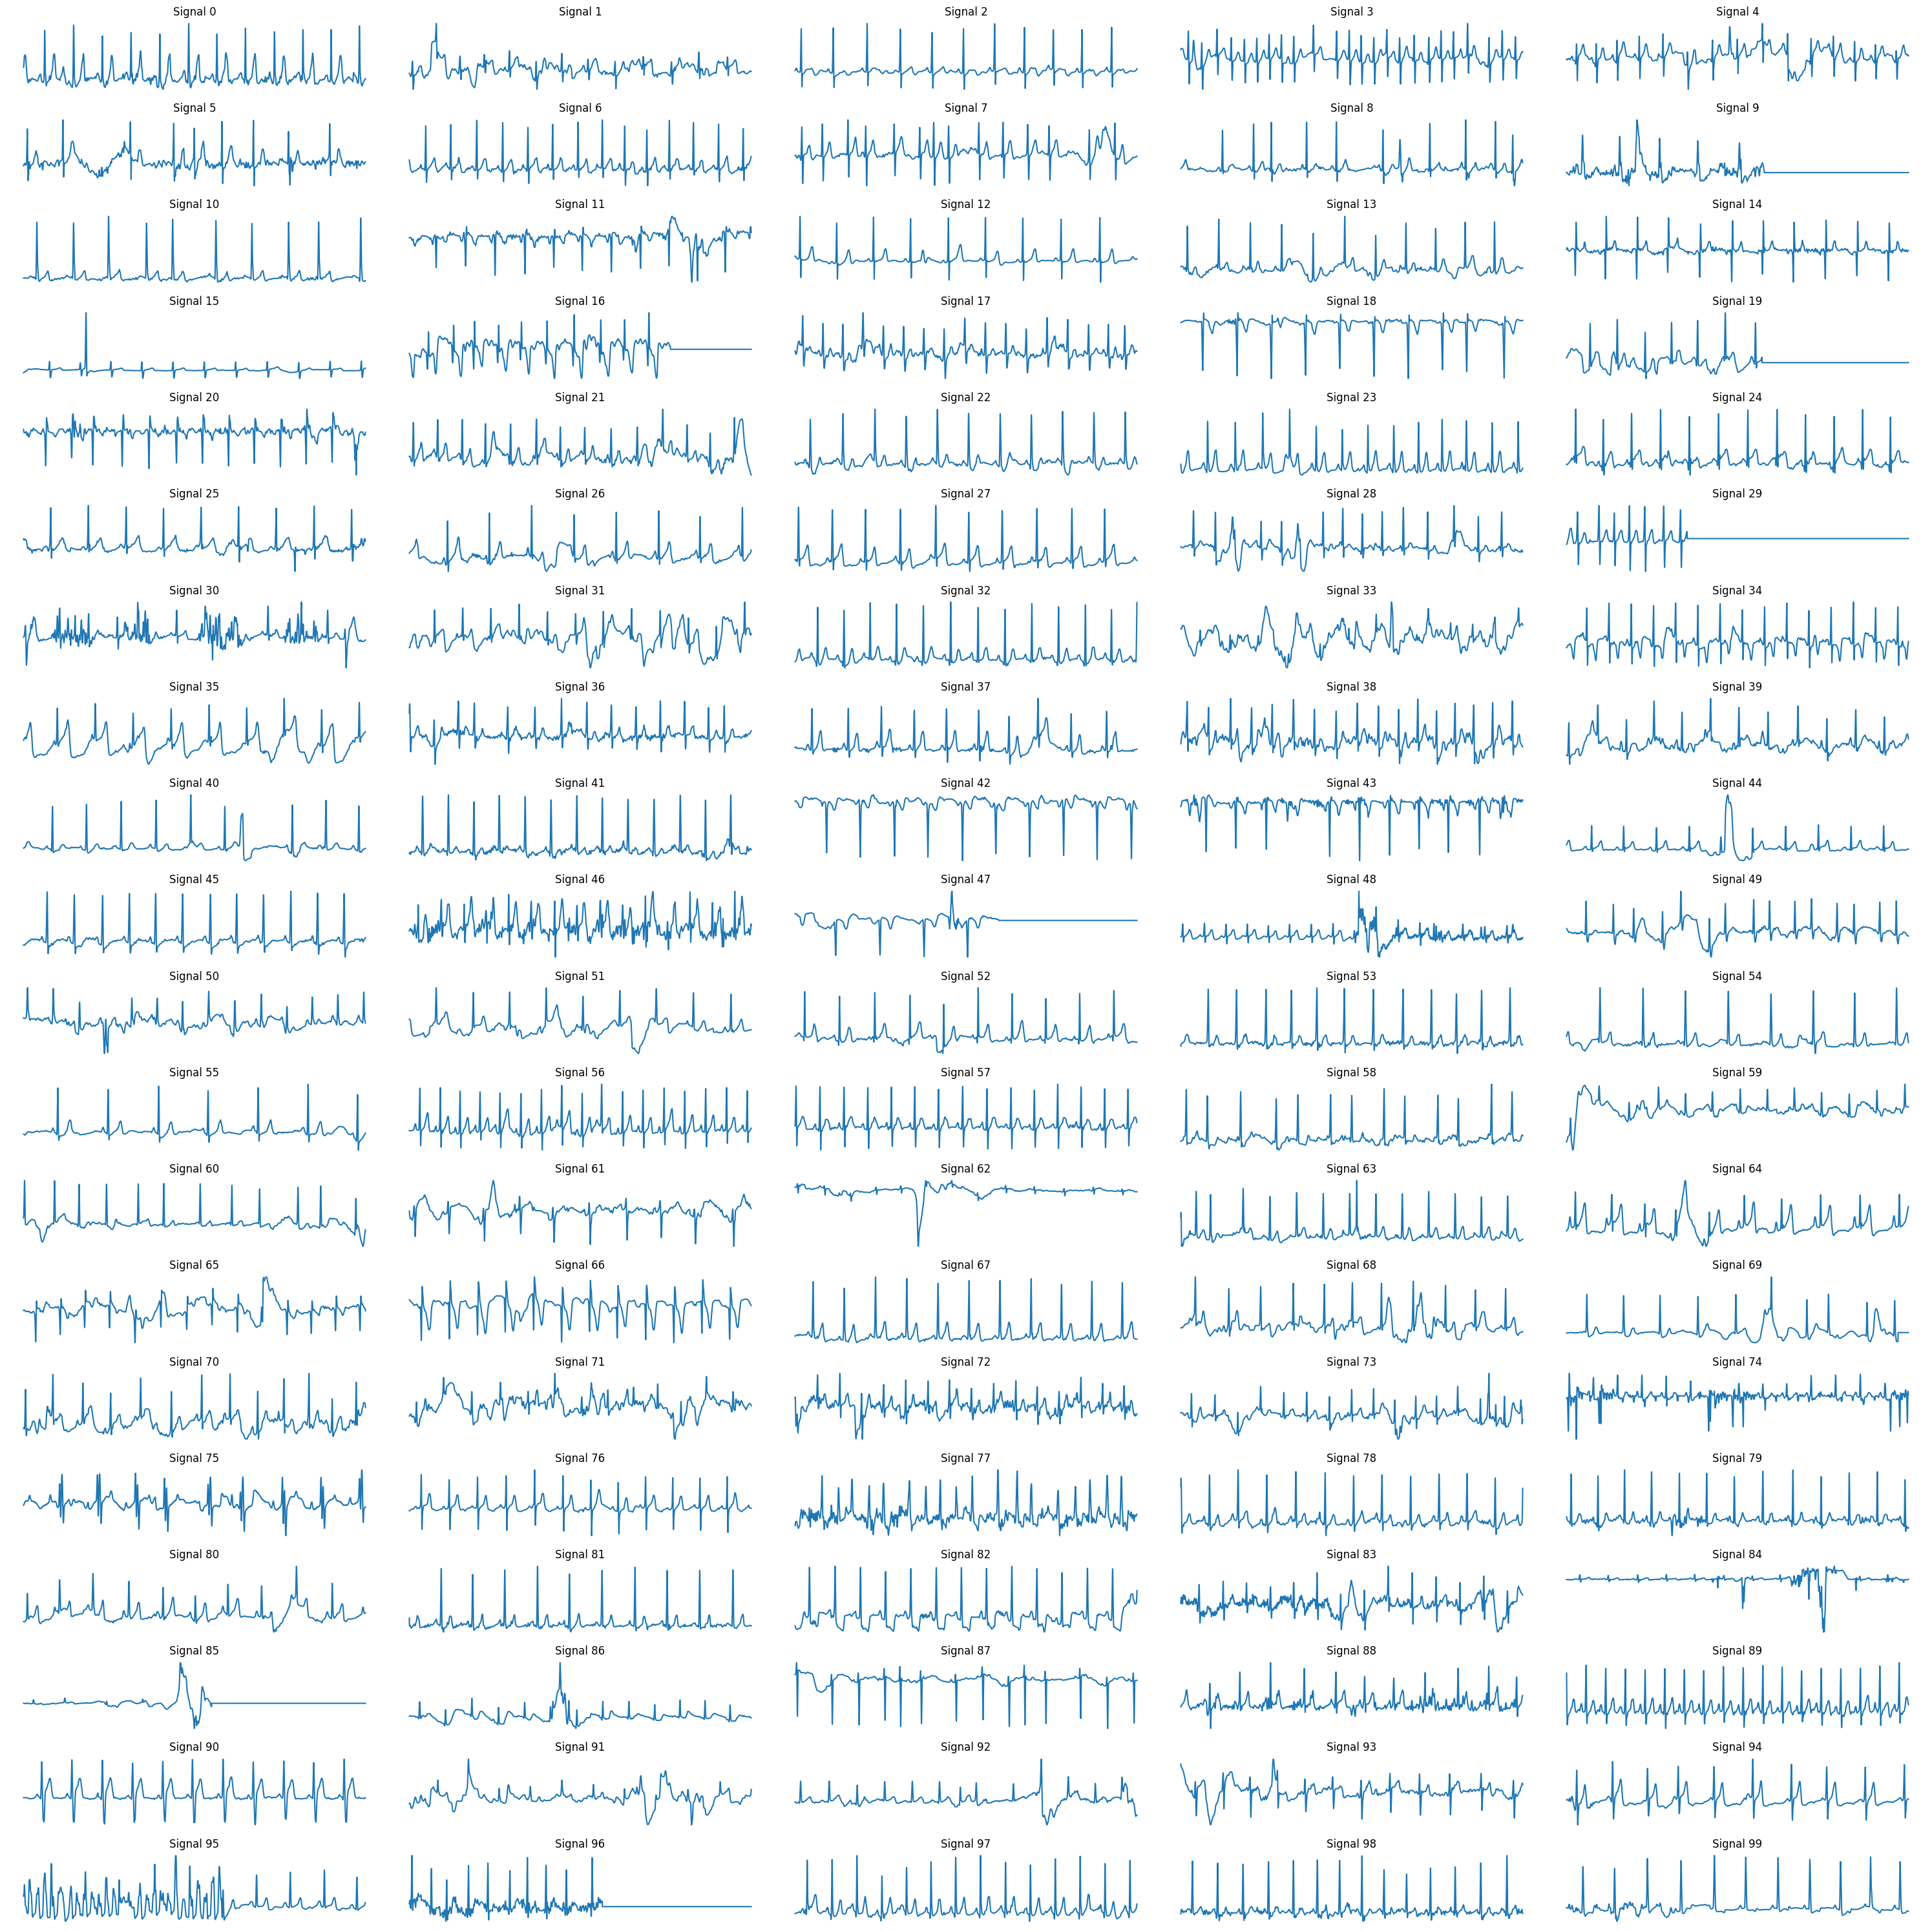

In [13]:
# Plot 30 signals to inspect (10 heartbeats starting from 1/3 of the signal)

signal_cols = [col for col in train.columns if col.startswith('x')]
sampling_rate = 300  # Adjust based on your dataset
num_heartbeats = 50

fig, axes = plt.subplots(20, 5, figsize=(30, 30))
axes = axes.flatten()

for i, (idx, row) in enumerate(train.head(100).iterrows()):
    signal = row[signal_cols].to_numpy(dtype="float32")

    # Estimate heartbeat duration in samples (~1 second per beat)
    heartbeat_duration = int(sampling_rate * 0.20)  # 1 second for each heartbeat
    start_idx = int(len(signal) / 10)  # Start at 1/3 of the signal
    end_idx = start_idx + num_heartbeats * heartbeat_duration  # Cover 10 heartbeats

    # Ensure indices are within the signal bounds
    start_idx = max(0, start_idx)
    end_idx = min(len(signal), end_idx)

    # Plot the sliced signal
    axes[i].plot(signal[start_idx:end_idx])
    axes[i].set_title(f"Signal {idx}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


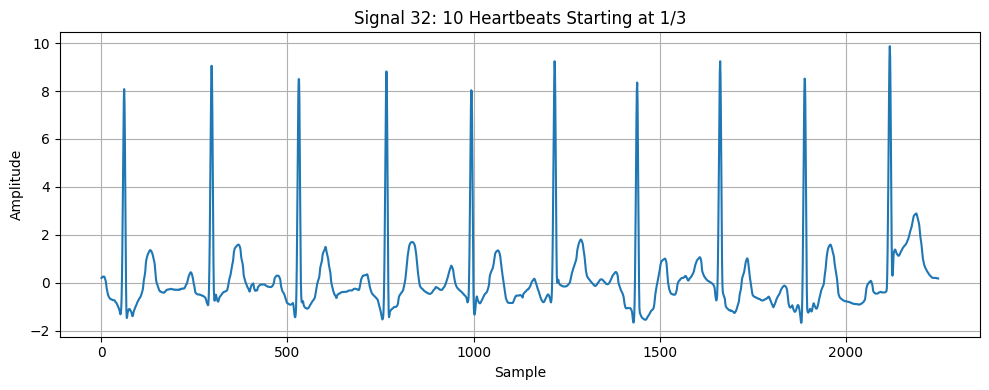

In [38]:
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 300  # Adjust based on your dataset
num_heartbeats = 10

# Select one signal
row = train.iloc[32]  # Use the first row for demonstration
# send row to csv
row.to_csv('data/row.csv')
# signal_cols = [col for col in train.columns if col.startswith('x')]
signal = row[signal_cols].to_numpy(dtype="float32")

# Estimate heartbeat duration in samples (~1 second per beat)
heartbeat_duration = int(sampling_rate * .75)  # 1 second per heartbeat
start_idx = int(len(signal) / 5)  # Start at 1/3 of the signal
end_idx = start_idx + num_heartbeats * heartbeat_duration  # Cover 10 heartbeats

# Ensure indices are within the signal bounds
start_idx = max(0, start_idx)
end_idx = min(len(signal), end_idx)

# Plot the sliced signal
plt.figure(figsize=(10, 4))
plt.plot(signal[start_idx:end_idx])
plt.title(f"Signal {row.name}: {num_heartbeats} Heartbeats Starting at 1/3")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()
